# Last day bias

#### This idea was taken from web which gives free trading strategies ideas, specifically the "quantitative" ones, the link which I get the idea is the following one: https://www.quantifiedstrategies.com/quantitative-trading-strategies/

#### The strategy says the following:     
*We go long at the close on the fifth last trading day of the month, and we exit after seven days, ie. at the close of the third trading day of the next month. 
Thus, the strategy is invested around 33% of the time.*


## 1. Import the libraries:

In [1]:
import backtrader as bt
import yfinance as yf
from datetime import datetime, timedelta


## 2. Definie the strategy:

In [2]:
class LastMonthBias(bt.Strategy):
    
    def __init__(self):
        self.dataclose = self.data.close
        self.bought = False
        
    def next(self):
      # Check if it's the fifth last trading day of the month
        if self.data.datetime.datetime().day <= 5:
            self.last_fifth_last_day = self.data.datetime.datetime()

        if self.last_fifth_last_day is not None and \
                self.data.datetime.datetime() == self.last_fifth_last_day + timedelta(days=4):
            if not self.bought:
                self.buy()
                self.bought = True

        # Check if it's the third trading day of the next month
        if self.last_fifth_last_day is not None and self.data.datetime.datetime() == \
                (self.last_fifth_last_day + timedelta(days=4) + timedelta(days=3)):
            if self.bought:
                self.sell()
                self.bought = False

## 3. Create cerebro & run backtest:

In [3]:
if __name__ == "__main__":
    cerebro = bt.Cerebro()
    ticker = "ES=F"
    starting = "2015-01-01"
    ending = "2023-01-01"
    
    data = yf.download(ticker, start = starting, end = ending)
    data = bt.feeds.PandasData(dataname= data)

    cerebro.adddata(data)
    cerebro.addstrategy(LastMonthBias)
    
    starting_cash = 10000
    cerebro.broker.set_cash(starting_cash)
    #cerebro.broker.setcommission(commission=0.001)  # 0.1% commission
    
    print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f}")

    cerebro.run()

    print(f"Ending Portfolio Value: {cerebro.broker.getvalue():.2f}")
    

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 10000.00
Ending Portfolio Value: 10207.25


<IPython.core.display.Javascript object>


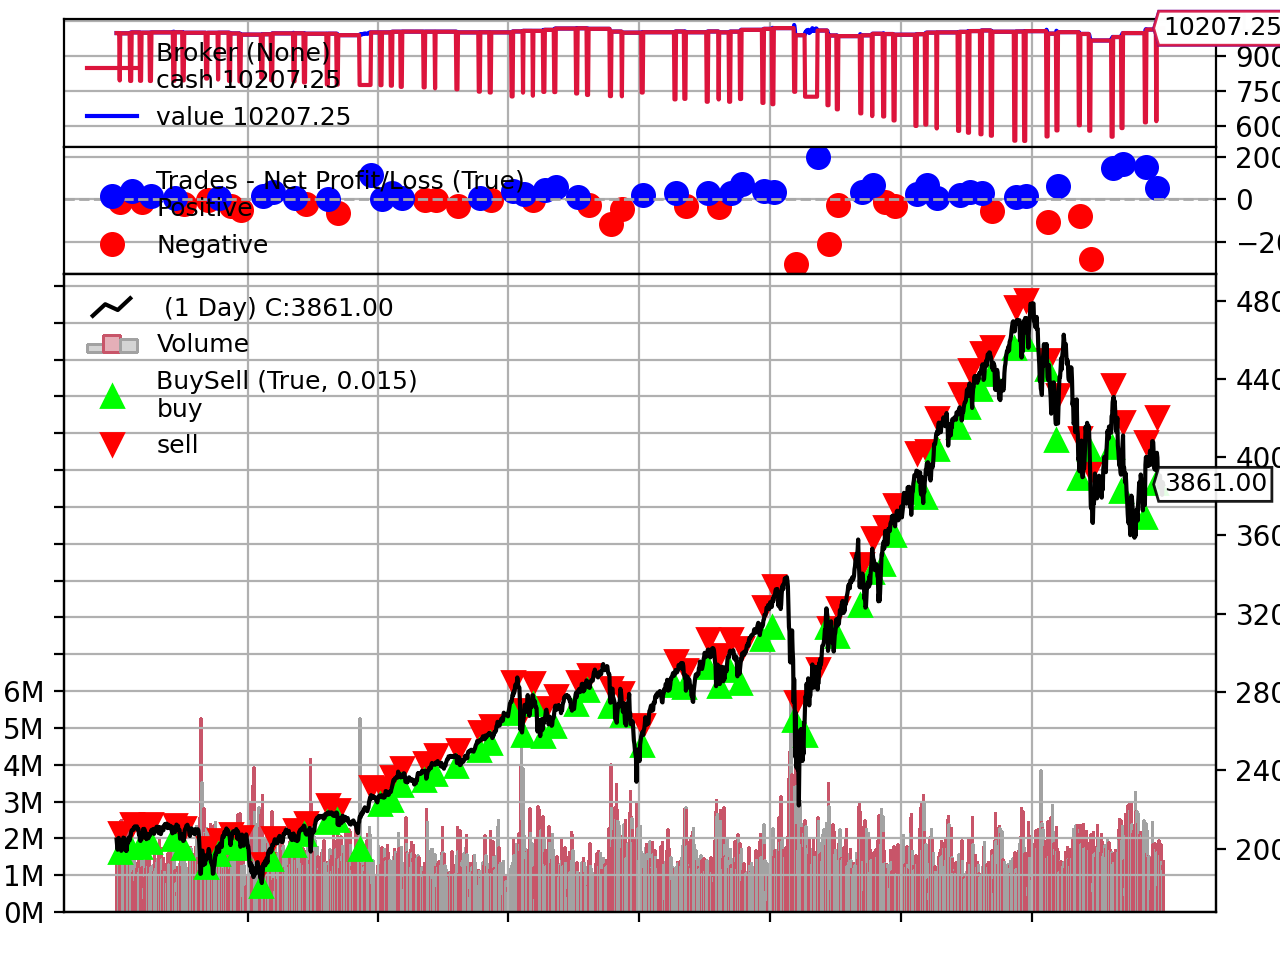

[[<Figure size 640x480 with 4 Axes>]]

In [4]:
cerebro.plot()

### Getting some basic annalysis:

In [5]:
annalize = cerebro.run()

In [6]:
for strat in annalize:
    print(f"Final Portfolio Value: {strat.broker.getvalue():.2f}")
    print(f"Total Return: {strat.broker.getvalue() - starting_cash:.2f}")
    print(f"Annualized Return: {(strat.broker.getvalue() / starting_cash) ** (252 / len(data)) - 1:.2%}")

Final Portfolio Value: 10207.25
Total Return: 207.25
Annualized Return: 0.26%


## Conclusion:

As we can see, this strategy doesn't looks very profitable without taking in consideration the commisions and also other factors like inflation